# Lending Case Sudy

## Project Brief
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

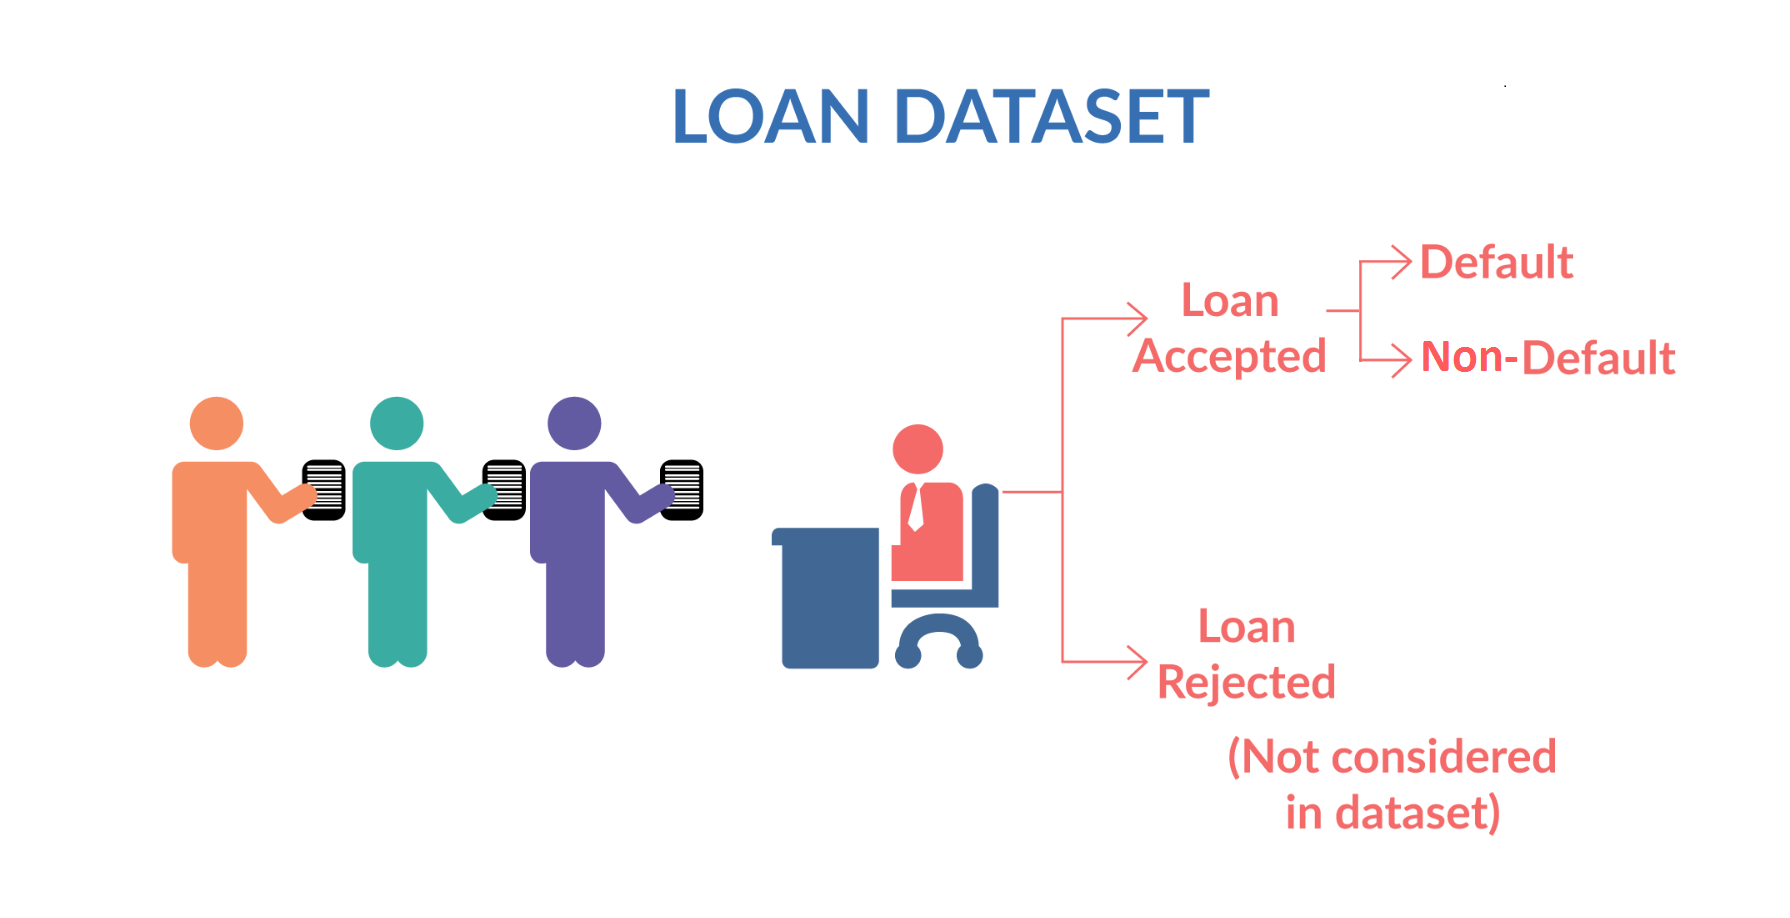

<b>Figure 1. Loan Data Set</b>

When a person applies for a loan, there are two types of decisions that could be taken by the company:

<b> Loan accepted </b>: If the company approves the loan, there are 3 possible scenarios described below:

- Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
- Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
- Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

<b>Loan rejected </b>: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [4]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')

inp=pd.read_csv("data/loan.csv", low_memory=False)
inp.head()
inp.shape

(39717, 111)

# Data understanding

Understanding data in term of business understanding
We categorize our data in three types of variables below and consider below variables as our basis of analysis.

<b>Customer's Demographic Information: </b>
- emp_title,
- emp_length,
- home_ownership,
- annual_inc,
- verification_status,
- addr_state,
- zip_code,
- title,
- purpose,
- desc,
- url,

<b>Loan Characteristics Information:</b>
			
- loan_amnt,
- funded_amnt,
- funded_amnt_inv,
- int_rate,
- loan_status,
- grade,
- sub_grade,
- dti,
- loan_issue_d,
- term,
- installment,

<b> Credit information (Customer Behaviour variables):</b>

- delinq_2yrs,
- earliest_cr_line,
- inq_last_6mths,
- open_acc,
- pub_rec,
- revol_bal,
- revol_util,
- total_acc,
- out_prncp,
- out_prncp_inv,
- total_pymnt,
- total_pymnt_inv,
- total_rec_prncp,
- total_rec_int,
- total_rec_late_fee,
- recoveries,
- collection_recovery_fee,
- last_pymnt_d,
- last_pymnt_amnt,
- next_pymnt_d,
- last_credit_pull_d,
- application_type,

All other variables are not associated in identifying the default as they come in picture when the loan is approved. But we are focused if we want to approve loan in starting or not.

Removing title, desc and url and zip_code columns from customer demographic as these will not be associated in identifying defaults.

<b>Business Objective:</b> To find the applicants which have strong probability of defaulting and also to identify the applicants which can repay their loan.
To meet business objective we will only consider the Customer Demographic and Loan Attributes and we will ignore the Customer behaviour attributes as these will not be known during the time of application.

# Data Quality Issues:

- Blank data in some columns identified and removed on below steps.
- Term column of loan had string values along with integer value, dealt with it below for further analysis. 
- Emp_length (work experience) field has string values along with integer value for experience, created a new column named work_experience in months and year for further analysis.
- Date format of some fields need to be converted to months , year etc for analysis
- loan_status column contained some random dates along with it.

# Data Cleaning and Manipulation

## The below operations are performed for better readablilty of data and reach to the columns were we need to focus on.

In [327]:
# 1. Duplicate data check

# function to check duplicate values in a column
def duplicate_check(colmn_name):
    return False if not True in list(inp[colmn_name].duplicated()) else True

for col in ["id", "member_id", "url"]:  # colum list identified as unique fields
    status = duplicate_check(col)       # fn called in for loop
    if status:
        inp.drop_duplicates(subset=col, keep=False, inplace=True)  # remove duplicate coln values  
    message = f"{col} Does not have duplicate values" if not status else f"{col} have duplicate values and they are removed"
    print(f"OUTPUT :{message}")
    

OUTPUT :id Does not have duplicate values
OUTPUT :member_id Does not have duplicate values
OUTPUT :url Does not have duplicate values


## Conclusion : 
- ### Found out that the columns observed as unique ie, "id", "member_id", "url" have no duplicate values.

In [328]:
# 2. Inaccurate data (checking for duplicate columns)

def column_check():
    if True in inp.columns.duplicated():
        print("There are duplicate columsn in the csv file")
    else:
        print("No column duplicates")
        
column_check()  

No column duplicates


## Conclusion: 
- ### No duplicate column names

In [329]:
# 3. removing non revelant data (removing all unnamed columns)

all_columns = list(filter(lambda x: x, inp.columns))
# print("all_columns", all_columns)

def remove_unnamed_columns():
    inp = inp.loc[:,~inp.columns.str.match("Unnamed")]
    print("Unnamed Columns are Removed")

if True in inp.columns.str.match("Unnamed"):
    remove_unnamed_columns()
else:
    print("No unnamed columns in data")


No unnamed columns in data


## Conclusion: 
- ### Unnamed columns not present in data.

In [330]:
# 4. blank data

# dropping columns that has NA values more than 90%
total_rows = inp.shape[0]

my_filter = filter(lambda x: x if inp[x].isna().sum()/total_rows > 0.9 else 0, inp.columns)
remove_col_list = list(my_filter) 
print(f"remove_col_list : {remove_col_list}")
inp_drop = inp.drop(remove_col_list, axis=1)
print("The column list are removed")


remove_col_list : ['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', '

## Conclusion: 
- ### Columns with NA > 90% is presnt and removed

# Data Analysis

## Observing data found that the below listed columns are best suit for the bussiness logic.

In [334]:
column_list = ["emp_title", "term","loan_amnt","funded_amnt_inv", "int_rate", "grade",
               "sub_grade", "annual_inc", "purpose", "dti", "emp_length", "issue_d",
               "home_ownership","verification_status", "addr_state", "installment",
               "loan_status", "funded_amnt"]

inp = inp[column_list]

In [335]:
inp.head()
inp.shape

(38577, 18)

### We can see the out put below current status can be neglected, as we are considering only fully paid and charged off.

In [336]:
inp.head()
inp.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### Considering only fully paid and charged off for analysis, so other values are removed

In [337]:
# querying for only Fully Paid & Charged Off loans
inp = inp.query("loan_status in ('Fully Paid','Charged Off')")
inp.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### checking for column-wise null values

In [338]:
# Checking for column-wise null percentages
round(100*(inp.isnull().sum()/len(inp.index)), 2)

emp_title              6.19
term                   0.00
loan_amnt              0.00
funded_amnt_inv        0.00
int_rate               0.00
grade                  0.00
sub_grade              0.00
annual_inc             0.00
purpose                0.00
dti                    0.00
emp_length             2.68
issue_d                0.00
home_ownership         0.00
verification_status    0.00
addr_state             0.00
installment            0.00
loan_status            0.00
funded_amnt            0.00
dtype: float64

## Conclusion: 
- ### The percentage of null values are less, so no column is dropped (We have already dropped null column values with % greater than 90%)

# Univariate Analysis

In [339]:
# Common function to plot countplot(bar graph for some categorical area).
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
def plt_frequency(x_var,data_df,x_label,title,
                  hue_var=None,rot_flag=0,
                  fig_size_x=12,fig_size_y=7):
    ncount = len(data_df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    # plot countplot
    ax = sns.countplot(x=x_var, data=data_df,
                       hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(),
                           rotation=40, ha="right",
                           fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount),
                    (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

## 1) Loan Status Column Analysis

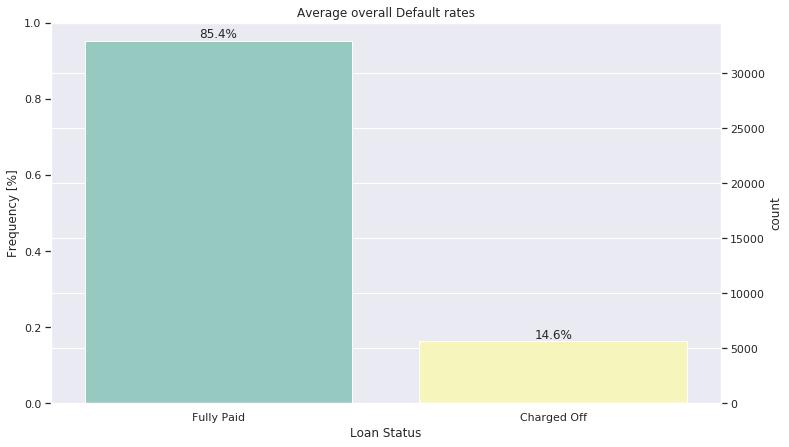

In [340]:
plt_frequency("loan_status",inp,'Loan Status','Average overall Default rates')

## Conclusion: 
- ### From above plots we can see that average default rate across all categories is 14.4% and non-default rate is 85.4%

## 2) Employee Work Experience Analysis

### converting emp_length column to digits for analysis 

In [341]:
# exctracting work experience from emp_length

#inp["work_experience"] = inp.emp_length.apply(lambda x: ("".join([i for i in str(x) if i.isdigit()])))

inp["emp_length"] = inp.emp_length.apply(lambda x: ("".join(filter(str.isdigit, str(x)))))

# Filtering the rows where experience is NA
inp = inp[inp['emp_length']!='']

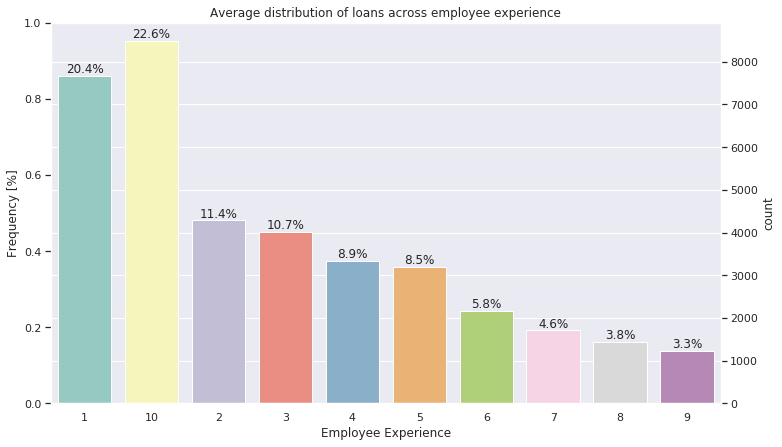

In [342]:
plt_frequency("emp_length",inp,'Employee Experience',
              'Average distribution of loans across employee experience')

## Conclusion: 
- ### People with experience 1 and 10 years are purchasing more loans. 

## 3) Loan Year Analysis

In [343]:
# exctracting year from Loan Date (issue_d) column()
import datetime

inp['issue_year'] = inp['issue_d'].apply(lambda x :
                                             datetime.datetime.strptime(x, '%b-%y').year)

inp.issue_year.value_counts()

2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

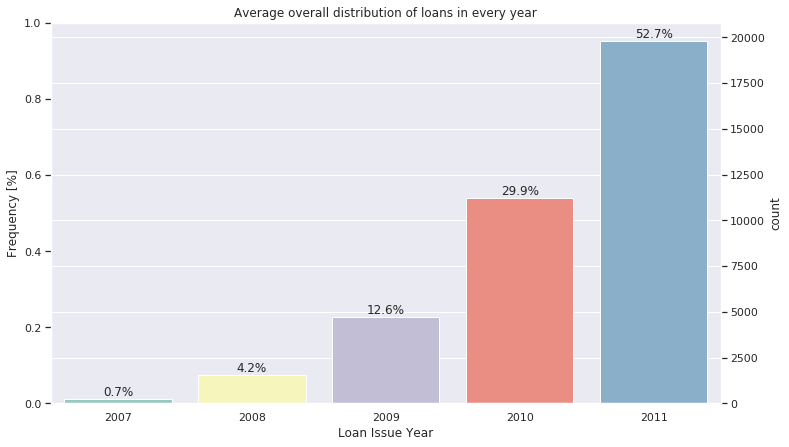

In [265]:
plt_frequency("issue_year",inp,'Loan Issue Year',
              'Average overall distribution of loans in every year')

## Conclusion: 
- ### Evalauation from year 2007 to 2011 the loan purchase are increasing every year.

## 4) Grade Column Analysis

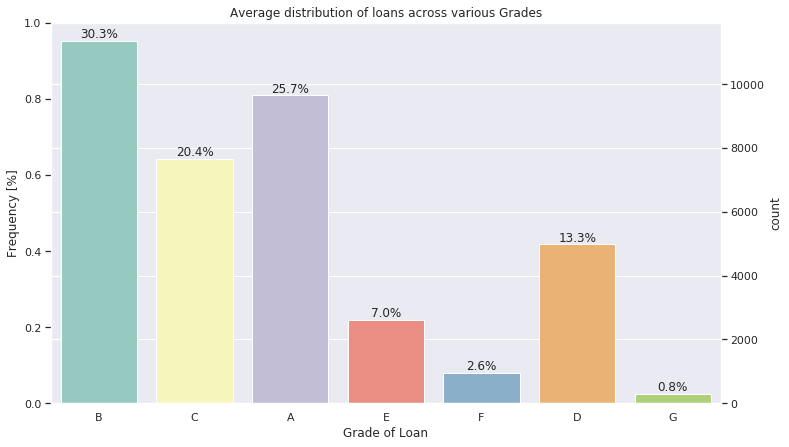

In [344]:
plt_frequency("grade",inp,'Grade of Loan',
              'Average distribution of loans across various Grades')

## Conclusion: 
- ### These are the percentage of loans across various grades.
- ### B type grade take the lead(30.3%), followed by the A type grades(26%). 

## 5) Purpose Column Analysis

### Checking for most occuring purpose values in  as there are lot of values.

In [345]:
# taking top 13 value of purpose column
inp_purpose = inp['purpose'].value_counts().iloc[:13]
print(inp_purpose)

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
Name: purpose, dtype: int64


### Taking top 13 values for analysis.

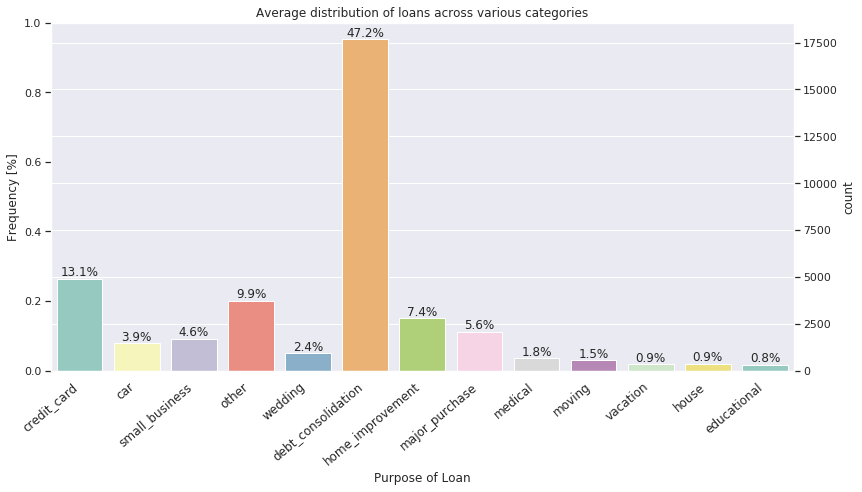

In [346]:
# considered values that have frequency above 1000

# purpose_tuple = ('debt_consolidation', 'credit_card', 'other', 'home_improvement',
#                 'major_purchase', 'small_business', 'car', 'wedding', 'medical',
#                 'moving', 'vacation', 'house', 'educational') 

# getting index values of purpose from the panda series
purpose_tuple = list(inp_purpose.index)
# querying the values from datframe and storing as a new dataframe
inp_purpose = inp.query(f"purpose in ({purpose_tuple})")

# plot
plt_frequency("purpose",inp_purpose,'Purpose of Loan',
              'Average distribution of loans across various categories',None,1)
plt.show()

## Conclusion: 
- ### The following are the top 13 categories where maximum loan applications have  recieved and hence high is there defaulting probability. 
- ### The highest probality to default is debt_consolidation.

# Insights from above univariate plots
### There is a more probability of defaulting when :

- From above plots we can see that average default rate across all categories is 14.4% and non-default rate is 85.4%.
- People with experience 1 and 10 years are purchasing more loans.
- B type grade take the lead(30.3%), followed by the A type grades(26%).
- The highest probality to default is debt_consolidation.

### Loan to annual income variable created

In [347]:
# Loan to annual income variable created
inp['l_t_ai'] = round(inp['loan_amnt']/inp['annual_inc'],2)

## Univariate segmented Analysis on new derived variables and on filtered data

## For better analysis we will limit our analysis on top6 loan categories.

- debt_consolidation
- credit_card
- other
- home_improvement
- major_purchase
- small_business

## Now we will filter the data for these categories and also we will derive new variables for our analysis

<b> We will derive below variables for our analysis</b>

- <b>dti range variable -</b> (Higher the dti ratio, lessen the chances of loan getting accepted)
    - dti < 10 (low),
    - dti > 10 and dt < 20 (medium),
    - else ‘high’

- <b>Loan-to-annual-income range variable -</b> (HIgher the ratio , more chances of defaulting)
    - l_t_ai < 0.1 (low), 
    - l_t_ai > 0.1 and < 0.2 (medium),
    - l_t_ai > 0.2 (high)

- <b>Experience category -</b>
    - exp < 3 years (junior),
    - exp between 3 - 7 years (senior),
    - exp > 7 years (specialist)

In [348]:
# function to range dti based on the specified conditions
def dti_range_calculator(dti):
    if dti <= 10.00:
        return 'low'
    elif (dti >10.00 and dti <= 20.00):
        return 'medium'
    else:
        return 'high'

# function to l_t_ai based on the specified conditions
def loan_to_annual_income_range_calculator(l_t_ai):
    if l_t_ai <= 0.10:
        return 'low'
    elif (l_t_ai >0.10 and l_t_ai <= 0.20):
        return 'medium'
    else:
        return 'high'

# function to experience based on the specified conditions
def experience_level(exp):
    if exp <= 3:
        return 'Junior'
    elif (exp >3 and exp <= 7):
        return 'Senior'
    else:
        return 'Specialist'
    
    
category_list = ['debt_consolidation','credit_card',
                 'other','home_improvement','major_purchase',
                 'small_business']


inp_category = inp.query('purpose == @category_list')


### 1.exp_level based on loan category

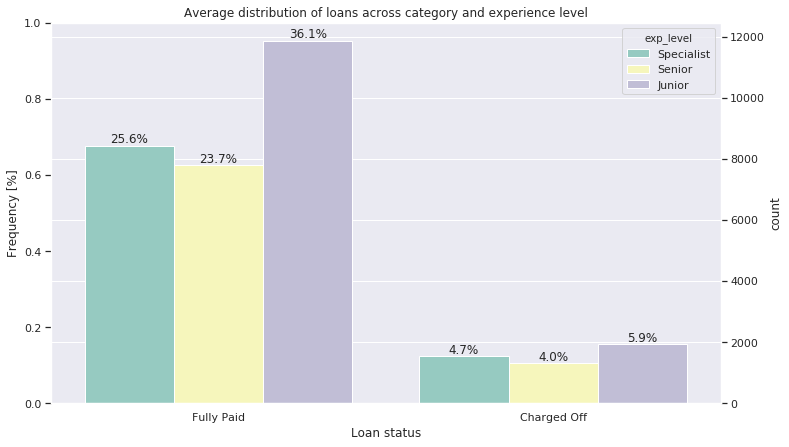

In [349]:
# integer exp_level from string emp_length
inp_category['exp_level'] = inp_category['emp_length'].apply(lambda x :
                                                             experience_level(int(x)))
# plot
plt_frequency("loan_status",inp_category,'Loan status',
              'Average distribution of loans across category and experience level',
              'exp_level')

## Conclusion :
- ### From the above graphs we can see that people with less experience have high chance of default.

### 2. debt-income-range based on loan category

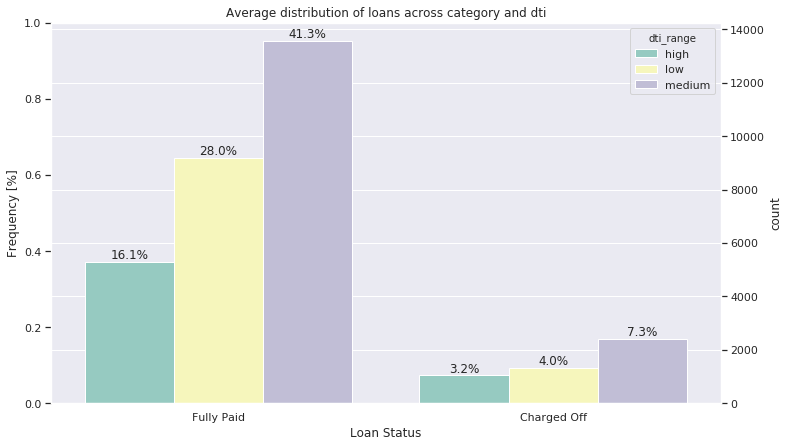

In [350]:
inp_category['dti_range'] = inp_category['dti'].apply(lambda x :
                                        dti_range_calculator(x) )
plt_frequency("loan_status",inp_category,'Loan Status',
              'Average distribution of loans across category and dti',
              'dti_range')

## Conclusion:
- ### People lying in medium dti range have high chances of default

### 3.loan-to-annual-icome-range based on loan category

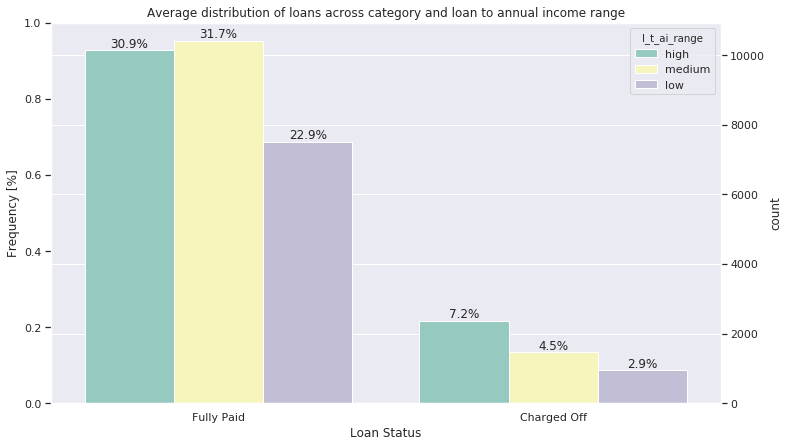

In [351]:
inp_category['l_t_ai_range'] = inp_category['l_t_ai'].apply(lambda x :
                                              loan_to_annual_income_range_calculator(x) )
plt_frequency("loan_status",inp_category,
              'Loan Status',
              'Average distribution of loans across category and loan to annual income range',
              'l_t_ai_range')

## Conclusion :
- ### People who have high loan to annual income ratio are at high risk of defaulting.

### 4.Grade based on loancategory

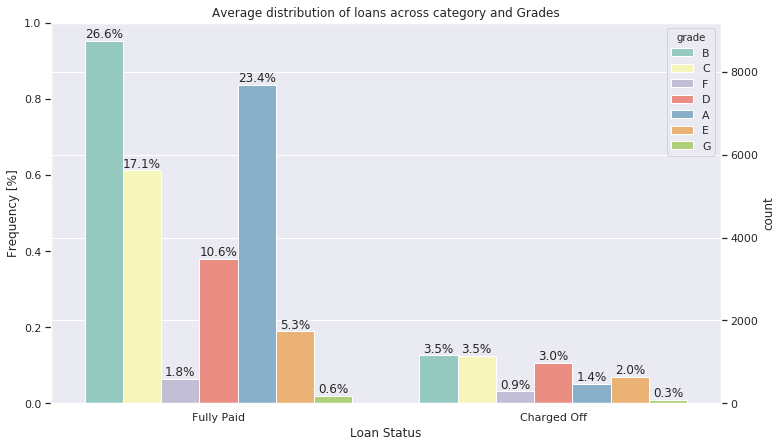

In [352]:
# loans['int_rate_float'] = loans['int_rate'].apply(lambda x : float(x.replace('%','')))
plt_frequency("loan_status",inp_category,'Loan Status',
              'Average distribution of loans across category and Grades',
              'grade')

## Conclusion :
- ### Grades B,Cand D are at high probablity of defaulting.

## Insights from above graphs from Univariate segmented Analysis on derived variiables

### There is a more probability of defaulting when :

- From the above graphs we can see that people with less experience have high chance of default.
- People lying in medium dti range have high chances of default.
- People who have high loan to annual income ratio are at high risk of defaulting.
- Grades B,Cand D are at high probablity of defaulting.

# Bivariate Analysis

## Now we will see how variables are corelated to each other. We will filter all the numerical values and will see the correlation of each variable with other quantized variable.

## Analysis For Correlation between some numerical columns

### Loan to annual income variable created

In [353]:
inp['l_t_ai'] = round(inp['loan_amnt']/inp['annual_inc'],2)

### Intrest rate converted to float for analysis

In [354]:
inp['int_rate_float'] = inp['int_rate'].apply(lambda x :
                                                  float(x.replace('%','')))
# inp = inp.reset_index(drop=True)

### Converting emp_length to float for analysis

In [355]:
inp['emp_length'] = inp['emp_length'].apply(lambda x : float(x))

### Filtering all the numerical values to understand their correlation

In [356]:
# Filtering all the numerical values to understand their correlation
inp_corr_df = inp.filter(["loan_amnt", "funded_amnt",
                          "funded_amnt_inv",'int_rate_float',
                          'installment','emp_length','annual_inc',
                          'dti','l_t_ai']) 

cor = inp_corr_df.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_float,installment,emp_length,annual_inc,dti,l_t_ai
loan_amnt,1.000,0.982,0.937,0.299,0.932,0.148,0.266,0.061,0.607
funded_amnt,0.982,1.000,0.955,0.303,0.958,0.148,0.262,0.061,0.595
funded_amnt_inv,0.937,0.955,1.000,0.296,0.904,0.159,0.249,0.070,0.563
int_rate_float,0.299,0.303,0.296,1.000,0.275,-0.001,0.046,0.112,0.211
installment,0.932,0.958,0.904,0.275,1.000,0.121,0.265,0.051,0.548
emp_length,0.148,0.148,0.159,-0.001,0.121,1.000,0.111,0.049,-0.004
annual_inc,0.266,0.262,0.249,0.046,0.265,0.111,1.000,-0.124,-0.233
dti,0.061,0.061,0.070,0.112,0.051,0.049,-0.124,1.000,0.148
l_t_ai,0.607,0.595,0.563,0.211,0.548,-0.004,-0.233,0.148,1.000


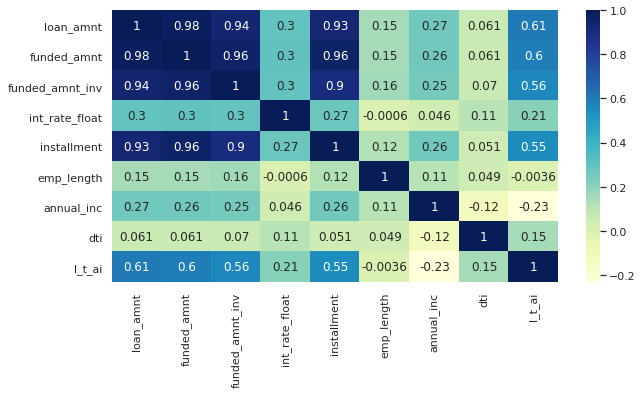

In [325]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,5))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

##  Conclusions:
- ### loan_amnt and installment has a positive correlation
- ### loan_amnt and int_rate_float has a moderate correlation

## 1) Analysing loan_amount with other columns for more insights

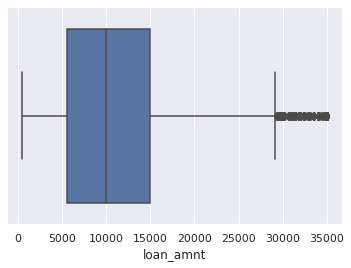

In [357]:
# checking for outliers and ranges
sns.boxplot(inp['loan_amnt'])

In [358]:
# grouping loan_amnt_based on the distribution
inp['loan_amnt_groups'] = pd.cut(inp['loan_amnt'],
                                       bins=7,precision=0,
                                       labels=['0-5k','5k-10k',
                                               '10k-15k','15k-20k',
                                               '20k-25k','25k-30k',
                                               '30k-35k'])

### 1.Loan Amount vs Interest Rate

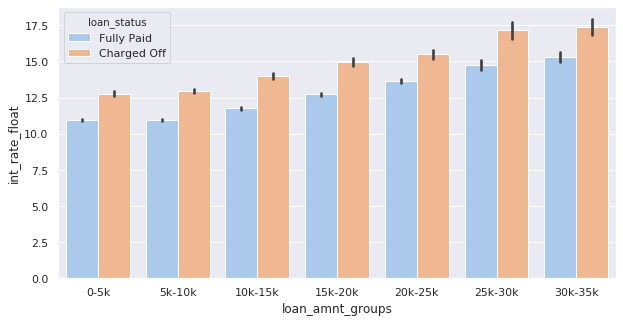

In [359]:
# 1.Loan Amount vs Interest Rate
plt.figure(figsize=(10,5))
sns.barplot(data =inp,x='loan_amnt_groups',
            y='int_rate_float', hue ='loan_status',
            palette="pastel")
plt.show()

## Conclusion: 
- ### Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %, they have the highest probality to default.

### 2.Loan vs Loan purpose

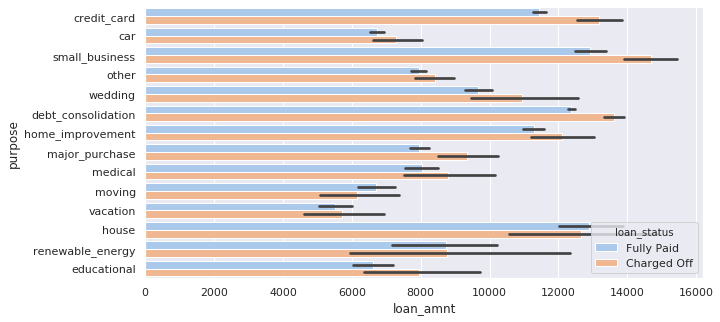

In [360]:
# 2.Loan vs Loan purpose

plt.figure(figsize=(10,5))
sns.barplot(data =inp,x='loan_amnt', y='purpose',
            hue ='loan_status',palette="pastel")

plt.show()

## Conclusion: 
- ### Applicants who have taken a loan for small business and the loan amount is greater than 14k have the highest chances to default.

### 3.Loan vs House Ownership

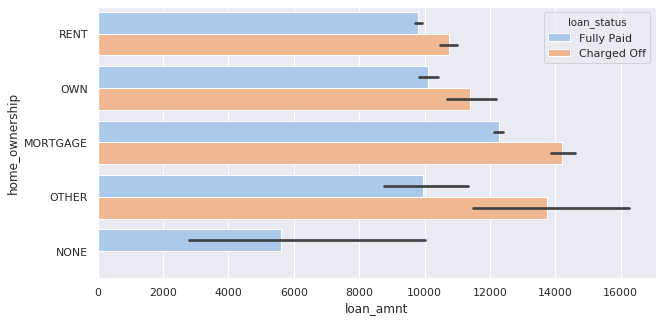

In [361]:
# 3.Loan vs House Ownership
plt.figure(figsize=(10,5))
sns.barplot(data =inp,x='loan_amnt',
            y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

## Conclusion: 
- ### Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k has the highest probablity to default.

### 4.Loan amount vs month issued and year issued

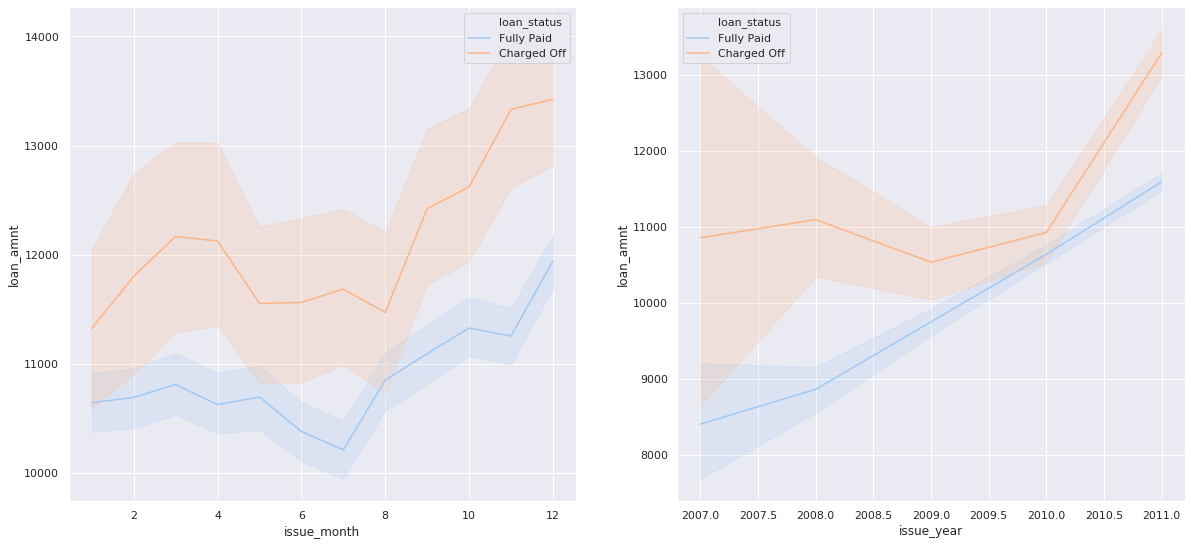

In [362]:
# 4.Loan amount vs month issued and year issued

# exctracting month from Loan Date (issue_d) column
import datetime

inp['issue_month'] = inp['issue_d'].apply(lambda x :
                                             datetime.datetime.strptime(x, '%b-%y').month)

# plotting
plt.figure(figsize=(20,20))

plt.subplot(221)
sns.lineplot(data =inp,y='loan_amnt',
             x='issue_month', hue ='loan_status',palette="pastel")


plt.subplot(222)
sns.lineplot(data =inp,y='loan_amnt',
             x='issue_year', hue ='loan_status',palette="pastel")
plt.show()

## Conclusion: 
- ### Maximum number of defaults occured when the loan was sanctioned/issued in month December. 
- ### Loan issued in the year 2011 also defaulted more as compared to other years.

### 5.Loan amount vs Grade

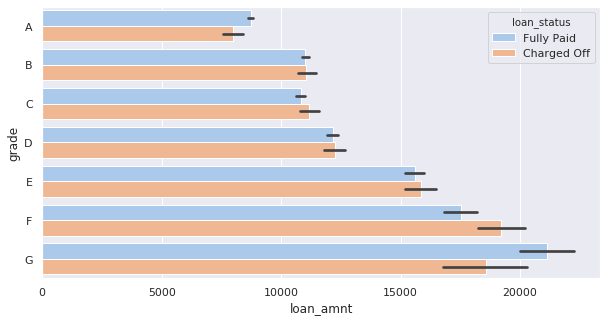

In [363]:
# 5.Loan amount vs Grade
plt.figure(figsize=(10,5))
sns.barplot(data =inp,x='loan_amnt',
            y='grade', hue ='loan_status',
            palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

## Conclusion: 
- ### When grade is F and loan amount is between 15k-20k, there is a greater chance to default.

### 6.Loan amount vs emp_length

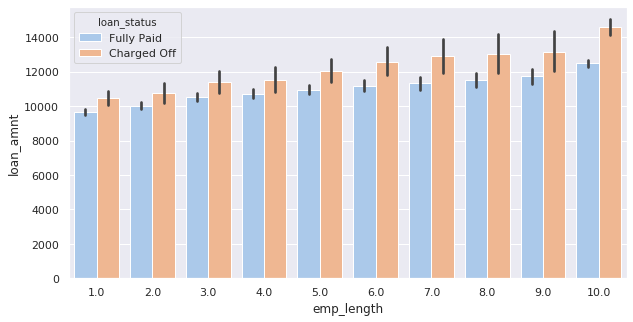

In [364]:
plt.figure(figsize=(10,5))
# plt.subplot(221)
sns.barplot(data =inp,y='loan_amnt', 
            x='emp_length', hue ='loan_status',
            palette="pastel")
plt.show()

## Conclusion:

- ### Employees with longer working history got the loan approved for a higher amount.

- ### When employment length is 10yrs and loan amount is 12k-14k, there are higher chance to default.


### 7.grade vs interest rate

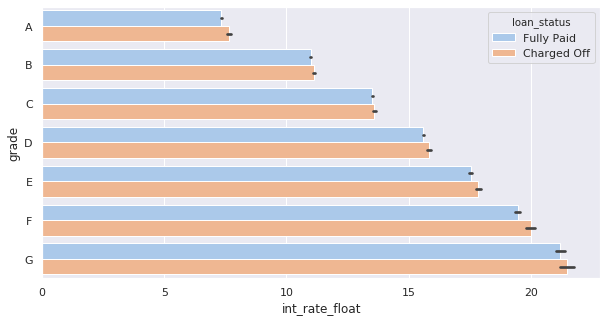

In [365]:
# 6.grade vs interest rate
plt.figure(figsize=(10,5))
sns.barplot(data =inp,x='int_rate_float',
            y='grade', hue ='loan_status',
            palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

## Conclusion:
- ### For grade G and interest rate above 20% there are high chances to default.

### 8.interest rate  and loan amount

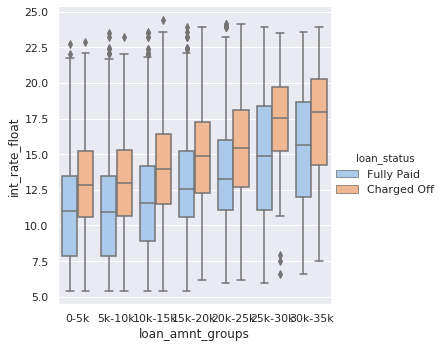

In [366]:
# fig,ax = plt.subplots(figsize = (15,6))
# plt.tight_layout()
sns.catplot(data =inp,y ='int_rate_float', x ='loan_amnt_groups',
            hue ='loan_status',palette="pastel",kind = 'box')
plt.show()

## This can be a pretty strong driving factor for loan defaulting.

## Conclusion:
- ### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.

- ### Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %

### 8.term and loan amount

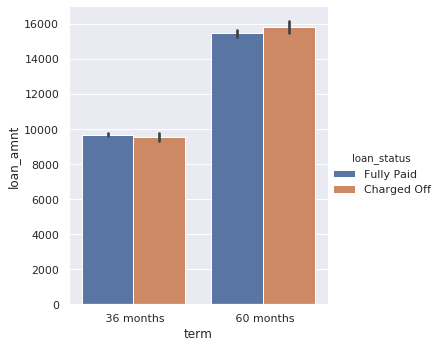

In [367]:
# 8.term and loan amount
sns.catplot(x = 'term', y = 'loan_amnt',
            data = inp,hue = 'loan_status',
            kind = 'bar')
plt.show()

## Conclusion:
- ### Applicants who applied and defaulted have no significant difference in loan_amounts Which means that applicants applying for long term has applied for more loan.

## 2) Analysing annual income with other columns for more insights

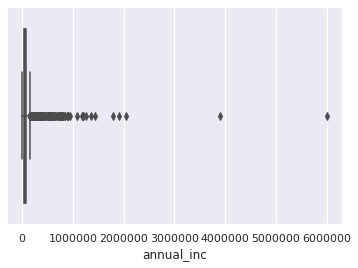

In [368]:
sns.boxplot(inp['annual_inc'])

### Clearly indincating the presence of outliers.So, Removing them.

- ### Let's see the quantile info and take an appropriate action.
- ### The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- ### So, considering threshold for removing outliers as 0.95

In [369]:
quantile_info = inp.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     60000.0
0.75     83000.0
0.90    116672.4
0.95    142000.0
0.97    166213.0
0.98    189996.0
0.99    235000.0
Name: annual_inc, dtype: float64

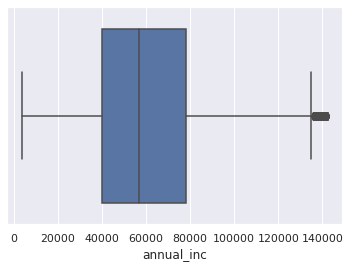

In [370]:
per_95_annual_inc = inp['annual_inc'].quantile(0.95)
inp = inp[inp.annual_inc <= per_95_annual_inc]
sns.boxplot(inp['annual_inc'])

### Now the "annual_inc" data looks good and proceeding next.

### 1.Annual income vs loan purpose

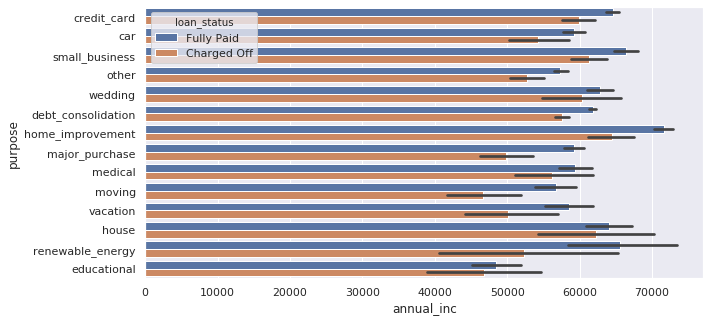

In [371]:
# 1.Annual income vs loan purpose
plt.figure(figsize=(10,5))
sns.barplot(data =inp,x='annual_inc',
            y='purpose', hue ='loan_status',
            palette="deep")
plt.show()

## Conclusion:

- ### Applicants taking loan for 'home improvement' and have income of 60k -70k have greater chance to default.

- ### Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses".

### 2.Annual income vs home ownership

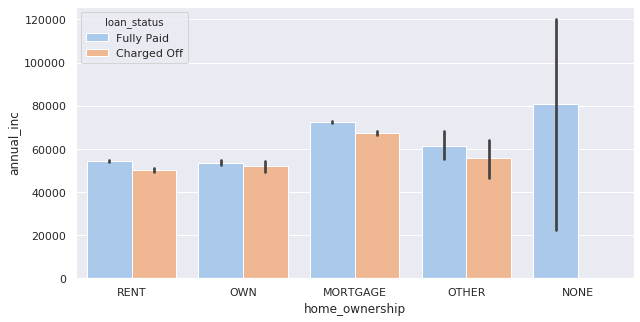

In [372]:
# 2.Annual income vs home ownership
plt.figure(figsize=(10,5))
sns.barplot(data =inp,x='home_ownership',
            y='annual_inc', hue ='loan_status',
            palette="pastel")
plt.show()

## Conclusion: 
- ### Applicants whose home ownership is 'MORTGAGE and have income of 60-80k has greater chance to default.

### 3.Annual Income vs Loan amount

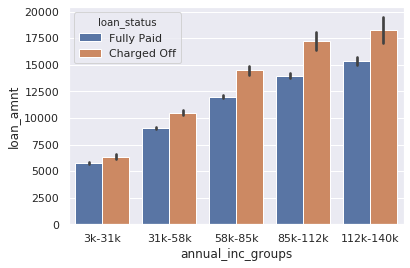

In [373]:
# Annual Income vs Loan amount

inp['annual_inc_groups'] = pd.cut(inp['annual_inc'], 
                                        bins=5,precision =0,
                                        labels =['3k-31k','31k-58k',
                                                 '58k-85k','85k-112k',
                                                 '112k-140k'])

sns.barplot(x = "annual_inc_groups", 
            y = "loan_amnt", hue = 'loan_status',
            data = inp)
plt.show()

## Conclusion:
- ### Across all the income groups, the loan_amount is higher for people who defaulted.

### 3. Annual income vs int_rate

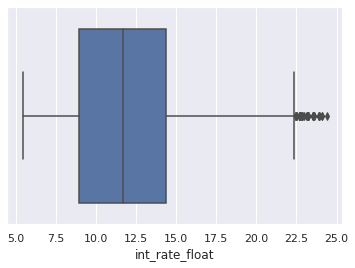

In [374]:
# checking for outliers and ranges
sns.boxplot(inp['int_rate_float'])

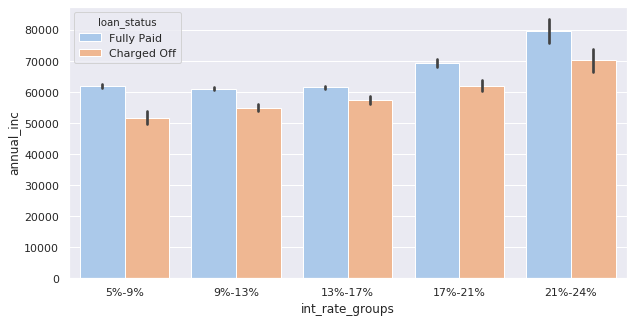

In [375]:
# 3. Annual income vs int_rate
inp['int_rate_groups'] = pd.cut(inp['int_rate_float'],
                                      bins=5,precision =0,
                                      labels=['5%-9%','9%-13%',
                                              '13%-17%','17%-21%',
                                              '21%-24%'])
                                
plt.figure(figsize=(10,5))
sns.barplot(data =inp,x='int_rate_groups',
            y='annual_inc', hue ='loan_status',
            palette="pastel")
plt.show()

## Conclusion: 
- ### Applicants who receive interest at the rate of 21-24% and have an income of 60k-70k, have high chance to default.

# Observations From Bivariate Analysis

<b>The above analysis with respect to the charged off loans.There is a more probability of defaulting when :</b>
    
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %.

- Applicants who have taken a loan for small business and the loan amount is greater than 14k.

- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k.

- Maximum number of defaults occured when the loan was sanctioned/issued in month December.

- Loan issued in the year 2011 also defaulted more as compared to other years.

- When grade is F and loan amount is between 15k-20k.

- When employment length is 10yrs and loan amount is 12k-14k.

- For grade G and interest rate above 20%.

- This can be a pretty strong driving factor for loan defaulting.
- The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %.

- Applicants taking loan for 'home improvement' and have income of 60k -70k.

- Applicants whose home ownership is 'MORTGAGE and have income of 60-80k.

- Across all the income groups, the loan_amount is higher for people who defaulted.

- Applicants who receive interest at the rate of 21-24% and have an income of 60k-70k.